In [ ]:
import sys
sys.path.append('./styles')
from init_style import init
init()

<!-- Header banner -->
<div class="banner"><div>OpenAD Demonstration</div><b>OpenAD<span>Tutorial</span></b></div>

## OpenAD Magic Commands

When using Magic commands to access the Openad toolkit you have 2 options 

1. `%openad` provides a simple user interface that provides styled and formatted objects back to the notebook. Tables use pandas Dataframe Styler object. These can be converted back to data frame objects using `.data` on the object or using the in memory assistant which will copy the last result to a file , dataframe or to the dataviewer.
  When this is available you will see `Next up, you can run: result open/edit/copy/display/as dataframe/save [as '<filename.csv>']` in the output.
  
  This magic command is the recommended version to use as it will provide all warning and results visually.
  
2. `%openadd` is the second form that allows you to return api style results in dataframe or list formats that can be used programatically for functions or flows in your notebook. This is good for prebuilt notebook process flows.

### Available Commands

To learn what commands available you simply need to enter a `?` at the command line or at a magic command to list avialable commands

In [ ]:
%openad ?

## Toolkit Help

To look at the help purely for a specific toolkit, you simply need to ensure the toolkit is added then run the following.

%openad add toolkit rxn

In [ ]:
%openad ? rxn

In [ ]:
%openad clear sessions
%openad remove toolkit ds4sd
%openad remove toolkit rxn
%openad add toolkit ds4sd
%openad add toolkit rxn
%openad set context ds4sd

## Working with OpenAD

There are a Range of different commands that can be run to navigate through the toolkit, looking at `workspaces`, `toolkits`, `files` and `runs` within `workspaces` etc.<br> For example:

In [ ]:
%openad list workspaces

In [ ]:
%openad list files 

### Runs

The concept of a run is to be able to re execute a consecutive set of commands in order, ideally that provide information to one another.

In [ ]:
%openad ? run

We are now going to create a run for demostration purposes.

In [ ]:
%openad create run

In [ ]:
%openad list all toolkits

In [ ]:
%openad set context rxn
%openad list rxn models

In [ ]:
%openad list runs

When we want to stop and record the run we simply execute the following.

In [ ]:
%openad save run as test_run3

We can display its contents with the following command.

In [ ]:
%openad display run test_run3

Now let's run it.

In [ ]:
%openad run test_run3

## Demonstration: Deep Search to RXN

We'll use <b>Deep Search</b> to scan patents for mentions of a drug, then use <b>RXN</b> to determine retrosynthesis paths.

First, let's ask the AI assistant how we should do it.

In [ ]:
%openad set llm bam

In [ ]:
%openad tell me how to get the canonical smiles string for a molecule and then what command to predict retrosynthesis

In [ ]:
mol = %openadd @aspirin>>canonical_smiles

%openad set context ds4sd
%openad search for patents containing molecule '{mol}'

%openad set context rxn
%openad predict retrosynthesis '{mol}'

## Demonstration: Sequence of commands

#### 1. Get a molecule's SMILES

In [ ]:
target_smile = %openadd @tritace>>canonical_smiles

#### 2. Query Deep Search for patent mentions

In [ ]:
%openad set context ds4sd
%openad search for patents containing molecule '{target_smile}'

#### 3. Inspect available domains and collections at Deep Search

In [ ]:
%openad display all collections 

#### 4. Learn about the collection we may find the most interesting

In [ ]:
%openad display collection details 'Crossref'

#### 5. Find which collections mention the molecule 'Sibofimloc'

In [ ]:
%openad display collection matches for 'Sibofimloc'

#### 6. Find papers discussing Sibofimloc and Safety

In [ ]:
%openad search collection 'crossref' for 'Sibofimloc AND safety' show (docs data)

#### 7. Inspect molecule properties

In [ ]:
%openad show molecule Sibofimloc

#### 8. Find similar molecules

This will let us consider similar targets to pursue if our further experiments don't work as intended.

In [ ]:
target_string = %openadd @Sibofimloc>>canonical_smiles
similar_targets = %openadd search for similar molecules to '{target_string}' save as 'similar_targets.csv'
display(similar_targets)

#### 9. Visually inspect molecules

In [ ]:
%openad load molecules using dataframe similar_targets
%openad show molecules 

#### 10. Find patents related to target

In [ ]:
%openad search for patents containing molecule '{target_string}'

#### 11. Find patents related to similar targets

In [ ]:
import pandas
patent_list = []
for similar_mol in similar_targets['SMILES']:
    results_df = %openadd search for patents containing molecule '{similar_mol}'
    patent_list = patent_list + results_df.to_dict(orient="records")

patent_list_df = pandas.DataFrame(patent_list)
patent_list_df

#### 12. Gather molecules from related patents

In [ ]:
%openad search for molecules in patents from dataframe patent_list_df

#### 13. Visualize all results

In [ ]:
%openad result open

#### 14. Visualize individual result

In [ ]:
%openad display molecule CCC(C)C(=O)N1CCC2(CC1)c1cc(C#CC3OC(CO)C(O)C(O)C3O)ccc1-c1ccc(C#CC3OC(CO)C(O)C(O)C3O)cc12

## Retrosynthesis Prediction

We'll run the retrosynthesis prediction on our original target molecule `Sibofimloc` to determine how to snythesize the molecule.

In [ ]:
%openad set context rxn
%openad predict retrosynthesis '{target_string}' using( max_steps=3 )

In [ ]:
%openad add molecule {target_string}
%openad enrich molecules with analysis
%openad show molecule {target_string}

## Interpreting  Recipes

In [ ]:
%openad interpret recipe 'To a stirred solution of 7-(difluoromethylsulfonyl)-4-fluoro-indan-1-one (110 mg, 0.42 mmol)\
in methanol (4 mL) was added sodium borohydride \
(24 mg, 0.62 mmol). The reaction mixture was stirred at ambient temperature for 1 hour.'

## Predicting Reaction Outcomes

#### Single Prediction

In [ ]:
%openad predict reaction 'Cl.CCC(=O)NCCC.O' use_saved

In [ ]:
%openad import from '~/openad_notebooks/examples/reactions.csv' to 'reactions.csv'
%openad predict reaction in batch from file 'reactions.csv'

#### Batch Predictions

In [ ]:
%openad predict reaction in batch from list ['BrBr.c1ccc2cc3ccccc3cc2c1CCO' ,'Cl.CCC(=O)NCCC.O'] 

#### Using the [use_saved] clause

Providing the ability to reuse recently run previous reaction runs

In [ ]:
%openad predict reaction in batch  from list ['BrBr.c1ccc2cc3ccccc3cc2c1CCO' ,'BrBr.c1ccc2cc3ccccc3cc2c1','Cl.CCC(=O)NCCC.O'] use_saved

In [ ]:
%openad set context rxn
import pandas
lst = ['BrBr.c1ccc2cc3ccccc3cc2c1CCO' ,'Cl.CCC(=O)NCCC.O'] 
batch_list = pandas.DataFrame(lst,columns=['reactions'])
%openad predict reaction topn in batch from dataframe batch_list using (topn=3) use_saved

## Quickly investingation and adding to a set of molecules

In [1]:
%openad add molecule tritace force
%openad add molecule aspirin force
%openad add molecule Ibuprofen force
%openad add molecule entresto force

<span style="color: #090">logging into RXN as: </span> phil.downey1@ibm.com <br> 
 <span style="color: #090">Workspace: </span> DEFAULT <br> 


RXN Project has been set to DEFAULT for this Workspace

<span style="color: #090">Molecule <span style="color: #dc0">tritace</span> was added</span> <br> 


<span style="color: #090">Molecule <span style="color: #dc0">aspirin</span> was added</span> <br> 


<span style="color: #090">Molecule <span style="color: #dc0">Ibuprofen</span> was added</span> <br> 


<span style="color: #090">Molecule <span style="color: #dc0">entresto</span> was added</span> <br> 


In [2]:
%openad list molecules

<span style="color: #ccc">Next up, you can run: </span>`result open`/`edit`/`copy`/`display`/`as dataframe`/`save [as '<filename.csv>']` <br> 


<span style="color: #090">You successfully logged in to <span style="color: #dc0">RXN</span></span> <br> 
<span style="color: #ccc">Your access token does not have an expiration date</span> <br> 


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

<span style="color: #090">Target Molecule:</span> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


Output()

Output()

Output()

Output()

###  <span style="color: #090">Showing path </span> 0 <span style="color: #090"> with confidence </span>0.999: <br> 


<span style="color: #090"> Reaction: </span>C1CCOC1 + CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


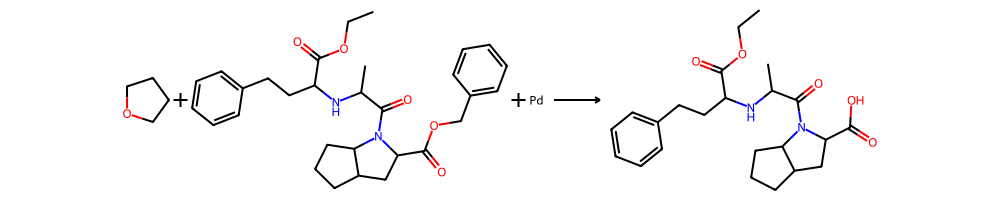

<span style="color: #090"> Reaction: </span>CC(=O)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + CCO + CCOC(=O)C(N)CCc1ccccc1 + [BH3-]C#N.[Na+] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


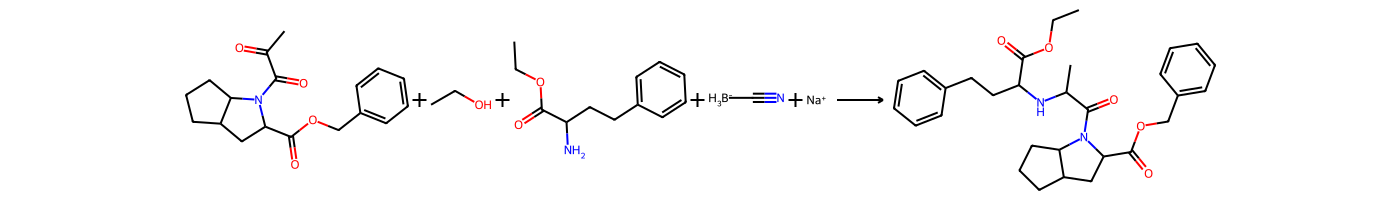

<span style="color: #090"> Reaction: </span>CC(=O)C(=O)Cl + O=C(OCc1ccccc1)C1CC2CCCC2N1 + c1ccncc1 --->> CC(=O)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


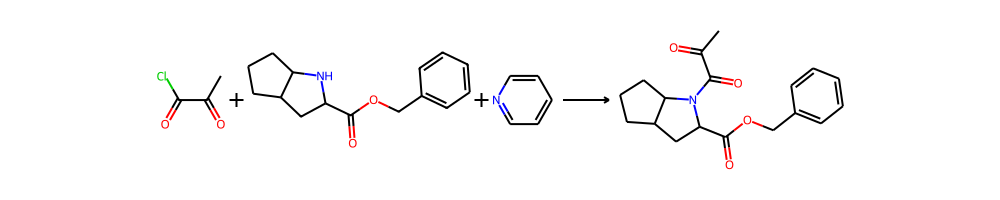

###  <span style="color: #090">Showing path </span> 1 <span style="color: #090"> with confidence </span>0.999: <br> 


<span style="color: #090"> Reaction: </span>C1CCOC1 + CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


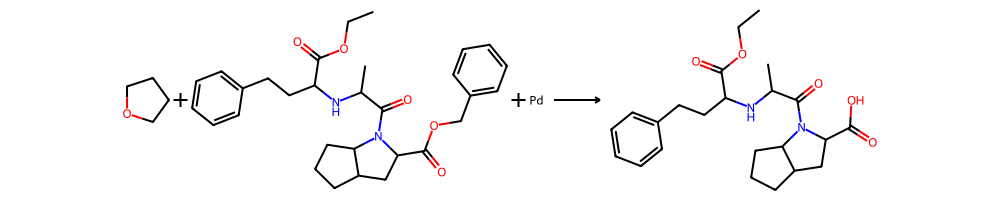

<span style="color: #090"> Reaction: </span>CC(=O)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + CCO + CCOC(=O)C(N)CCc1ccccc1 + [BH3-]C#N.[Na+] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


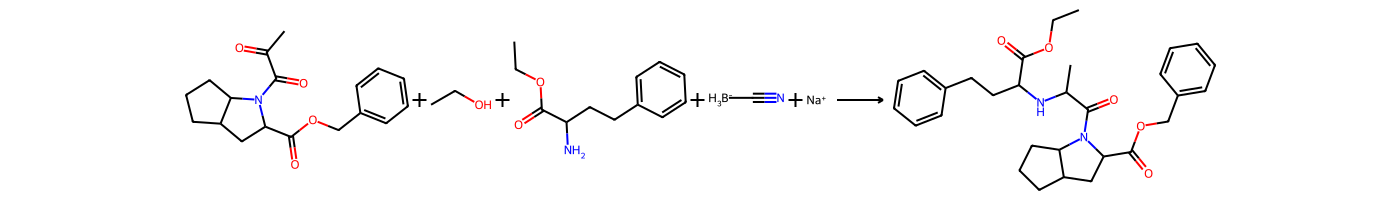

<span style="color: #090"> Reaction: </span>CC(=O)C(=O)Cl + O=C(OCc1ccccc1)C1CC2CCCC2N1 --->> CC(=O)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


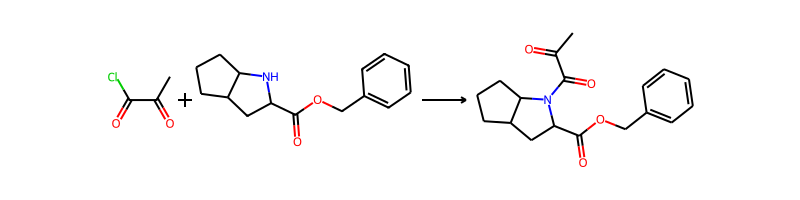

###  <span style="color: #090">Showing path </span> 2 <span style="color: #090"> with confidence </span>0.999: <br> 


<span style="color: #090"> Reaction: </span>C1CCOC1 + CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


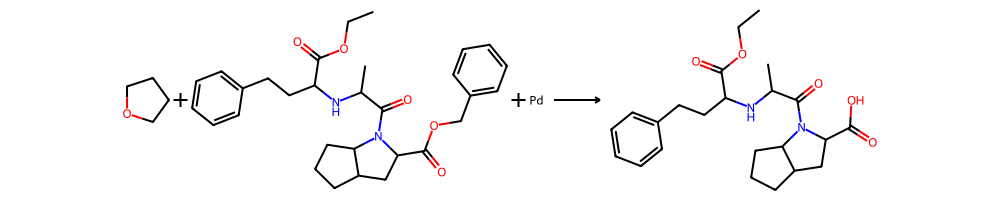

<span style="color: #090"> Reaction: </span>CC(=O)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + CCO + CCOC(=O)C(N)CCc1ccccc1 + [BH3-]C#N.[Na+] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


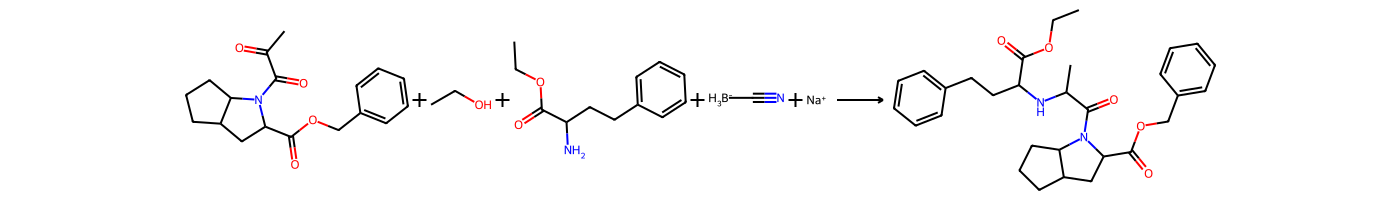

<span style="color: #090"> Reaction: </span>CC(=O)C(=O)Cl + ClCCl + O + O=C(OCc1ccccc1)C1CC2CCCC2N1 --->> CC(=O)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


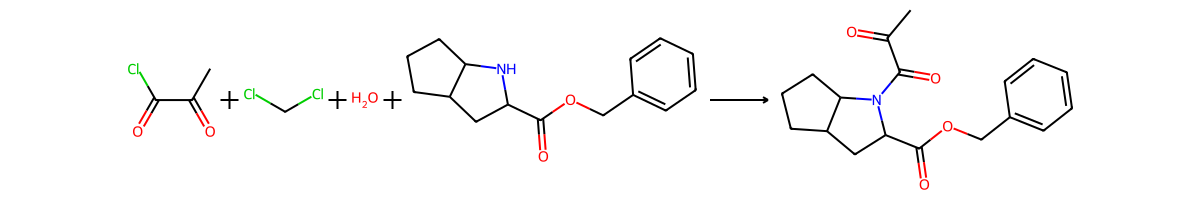

###  <span style="color: #090">Showing path </span> 3 <span style="color: #090"> with confidence </span>0.999: <br> 


<span style="color: #090"> Reaction: </span>C1CCOC1 + CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


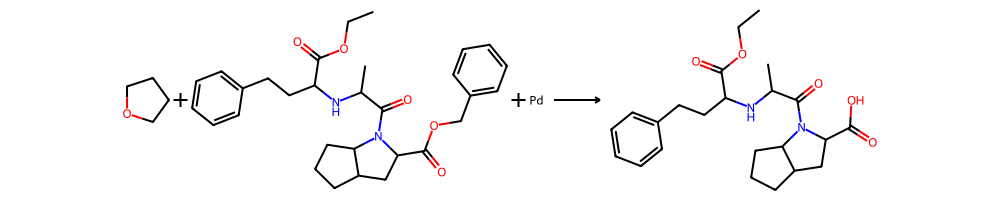

<span style="color: #090"> Reaction: </span>CC(=O)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + CCO + CCOC(=O)C(N)CCc1ccccc1 + [BH3-]C#N.[Na+] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


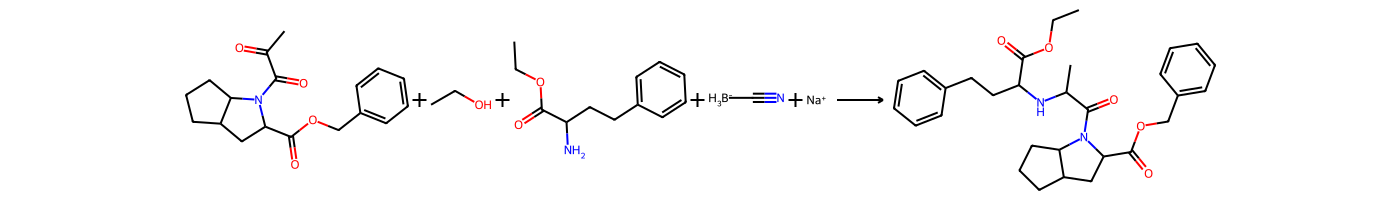

<span style="color: #090"> Reaction: </span>CC(=O)C(=O)Cl + ClCCl + O=C(OCc1ccccc1)C1CC2CCCC2N1 + O=C([O-])O.[Na+] --->> CC(=O)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


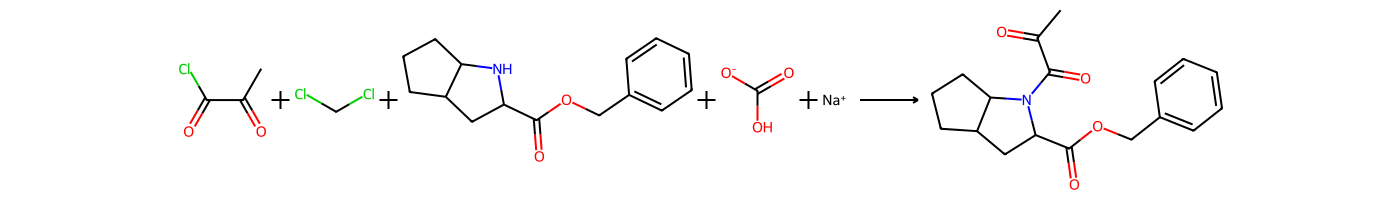

###  <span style="color: #090">Showing path </span> 4 <span style="color: #090"> with confidence </span>0.999: <br> 


<span style="color: #090"> Reaction: </span>C1CCOC1 + CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


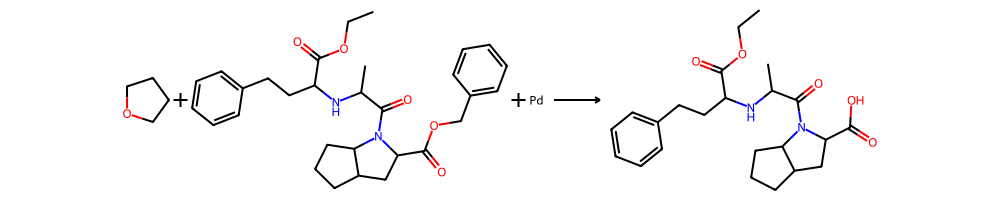

<span style="color: #090"> Reaction: </span>CC(=O)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + CCO + CCOC(=O)C(N)CCc1ccccc1 + [BH3-]C#N.[Na+] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


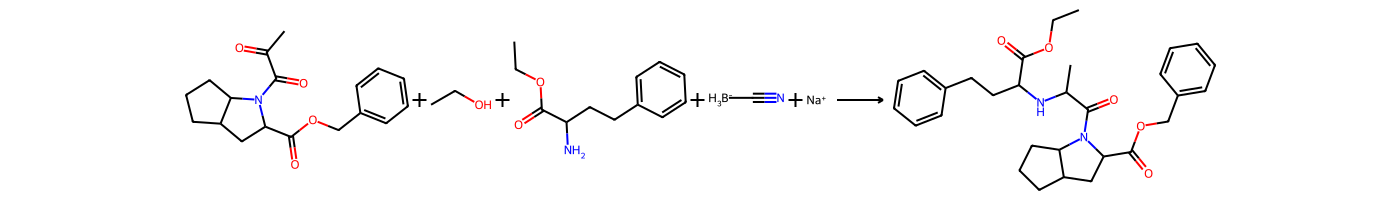

<span style="color: #090"> Reaction: </span>CC(=O)C(=O)Cl + ClCCl + O + O=C(OCc1ccccc1)C1CC2CCCC2N1 + c1ccncc1 --->> CC(=O)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


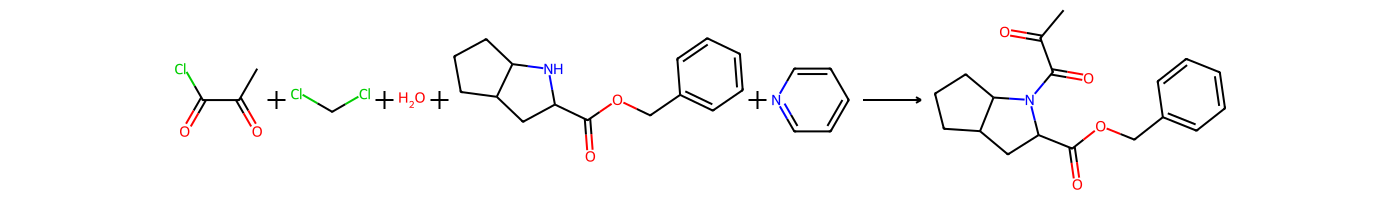

###  <span style="color: #090">Showing path </span> 5 <span style="color: #090"> with confidence </span>0.999: <br> 


<span style="color: #090"> Reaction: </span>C1CCOC1 + CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


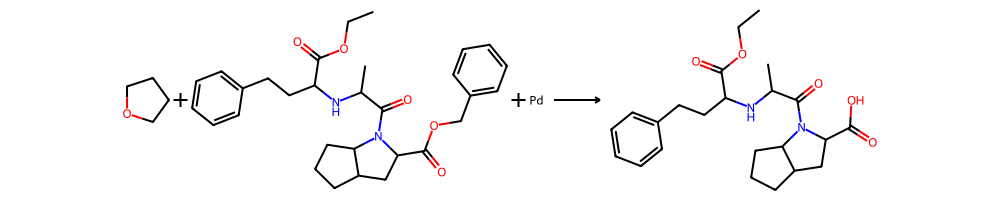

<span style="color: #090"> Reaction: </span>CC(=O)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + CCO + CCOC(=O)C(N)CCc1ccccc1 + [BH3-]C#N.[Na+] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


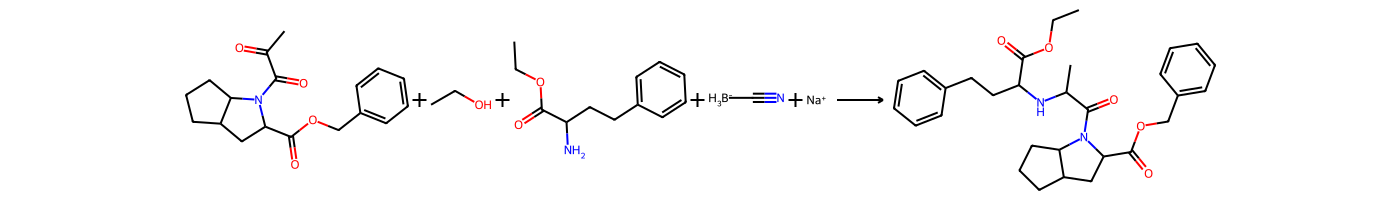

<span style="color: #090"> Reaction: </span>CC(=O)C(=O)Cl + ClCCl + O=C(OCc1ccccc1)C1CC2CCCC2N1 + c1ccncc1 --->> CC(=O)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


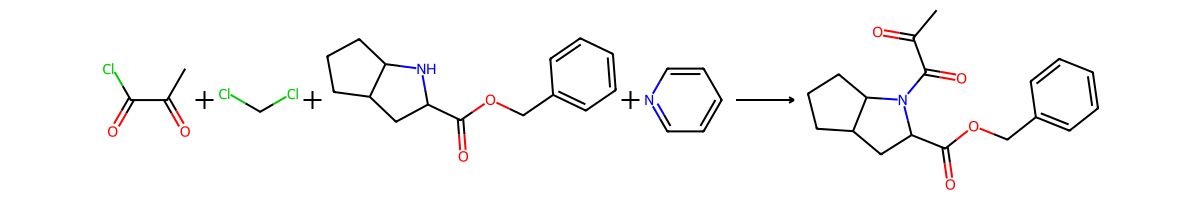

###  <span style="color: #090">Showing path </span> 6 <span style="color: #090"> with confidence </span>0.999: <br> 


<span style="color: #090"> Reaction: </span>C1CCOC1 + CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


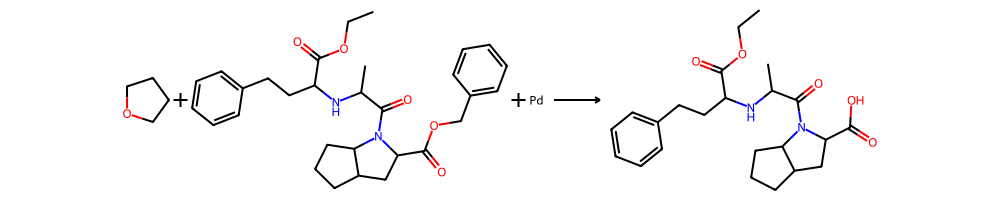

<span style="color: #090"> Reaction: </span>CC(=O)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + CCO + CCOC(=O)C(N)CCc1ccccc1 + [BH3-]C#N.[Na+] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


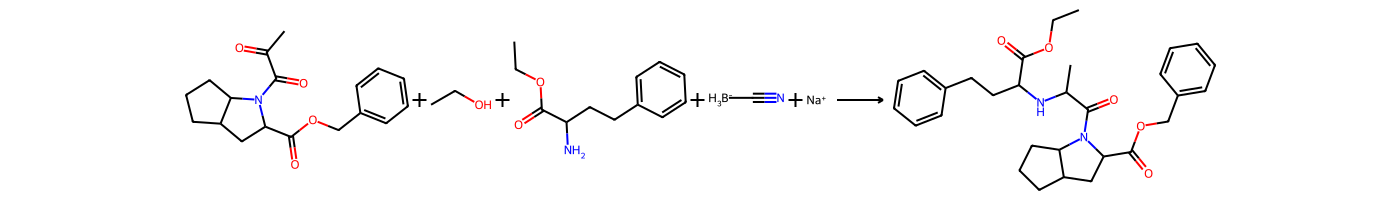

<span style="color: #090"> Reaction: </span>CC(=O)C(=O)Cl + ClCCl + O=C(OCc1ccccc1)C1CC2CCCC2N1 --->> CC(=O)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


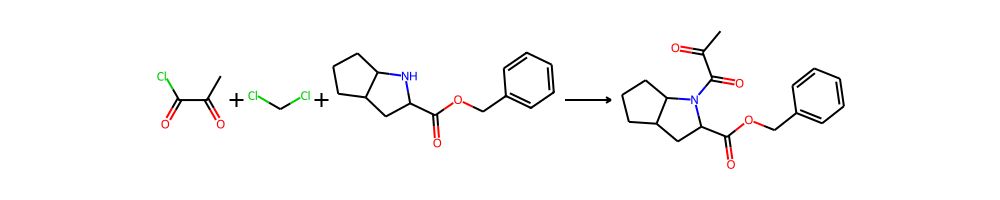

###  <span style="color: #090">Showing path </span> 7 <span style="color: #090"> with confidence </span>0.999: <br> 


<span style="color: #090"> Reaction: </span>C1CCOC1 + CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


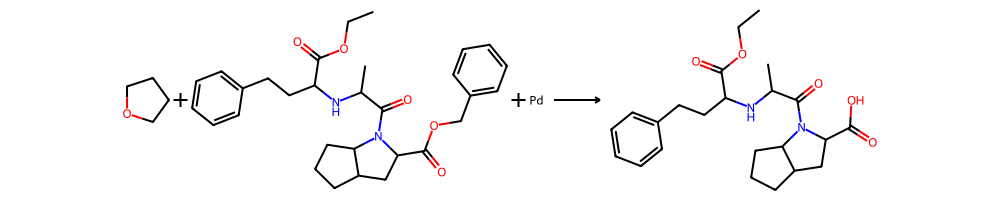

<span style="color: #090"> Reaction: </span>CC(=O)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + CCO + CCOC(=O)C(N)CCc1ccccc1 + [BH3-]C#N.[Na+] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


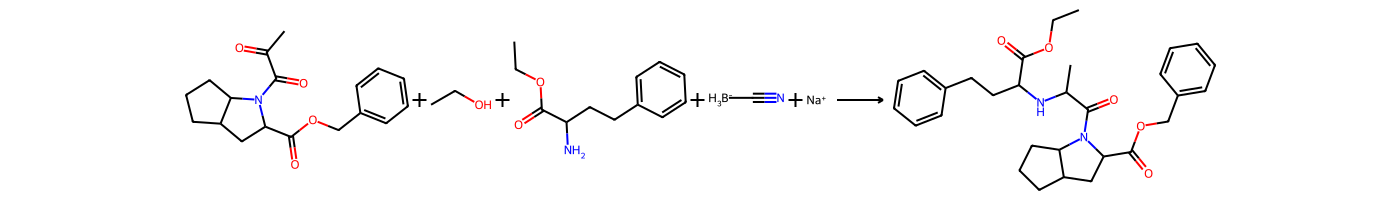

<span style="color: #090"> Reaction: </span>CC(=O)C(=O)Cl + CCN(CC)CC + ClCCl + O + O=C(OCc1ccccc1)C1CC2CCCC2N1 --->> CC(=O)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


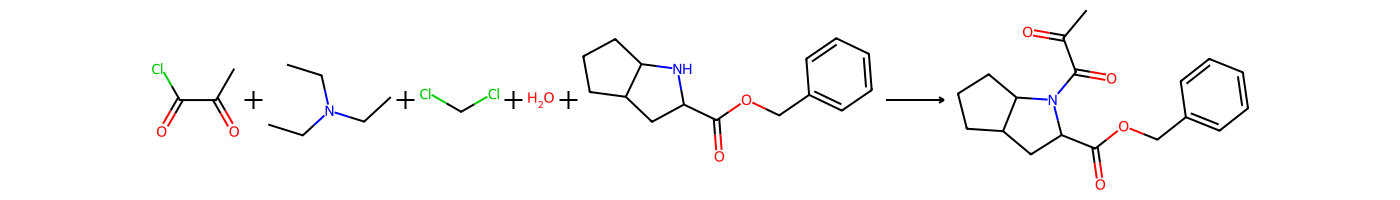

###  <span style="color: #090">Showing path </span> 8 <span style="color: #090"> with confidence </span>0.999: <br> 


<span style="color: #090"> Reaction: </span>C1CCOC1 + CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


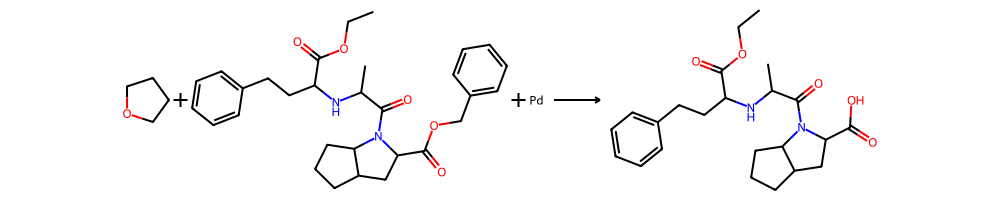

<span style="color: #090"> Reaction: </span>CC(=O)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + CCO + CCOC(=O)C(N)CCc1ccccc1 + [BH3-]C#N.[Na+] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


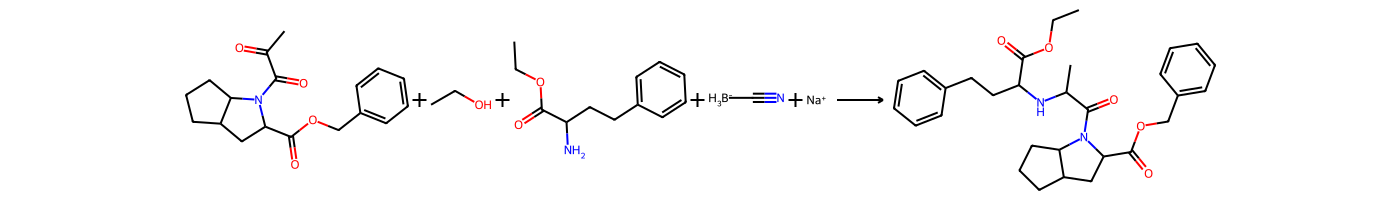

<span style="color: #090"> Reaction: </span>CC(=O)C(=O)Cl + CCN(CC)CC + ClCCl + O=C(OCc1ccccc1)C1CC2CCCC2N1 --->> CC(=O)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


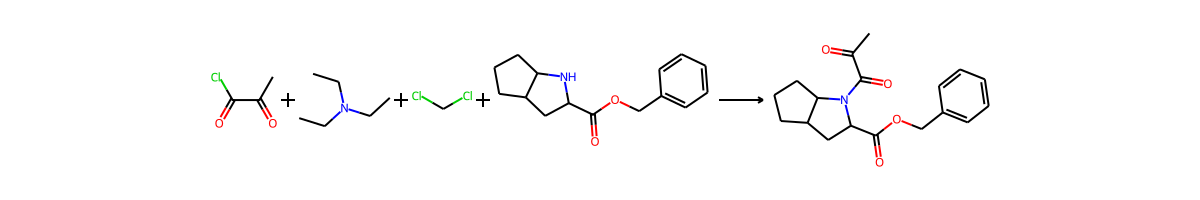

###  <span style="color: #090">Showing path </span> 9 <span style="color: #090"> with confidence </span>0.995: <br> 


<span style="color: #090"> Reaction: </span>CC(N)C(=O)N1C(C(=O)O)CC2CCCC21 + CCOC(=O)C(=O)CCc1ccccc1 + [BH3-]C#N.[Na+] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


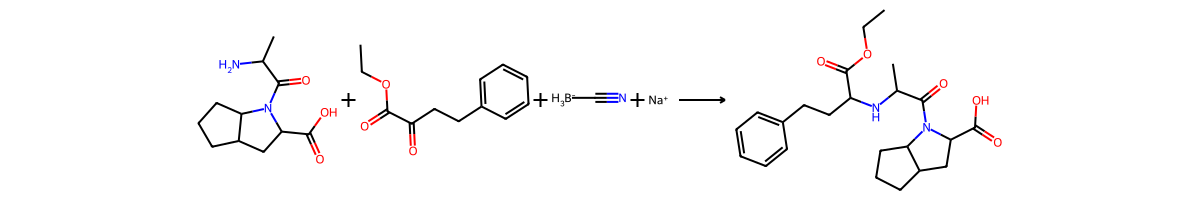

<span style="color: #090"> Reaction: </span>CC(NC(=O)OCc1ccccc1)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CC(N)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


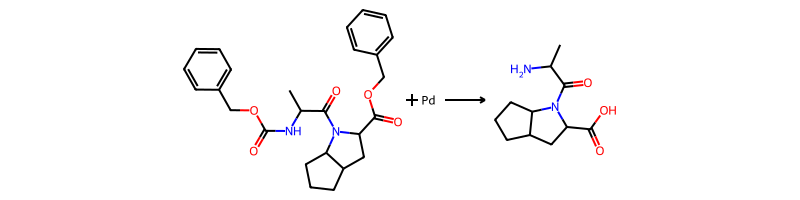

<span style="color: #090"> Reaction: </span>CC(NC(=O)OCc1ccccc1)C(=O)O + O=C(OCc1ccccc1)C1CC2CCCC2N1 --->> CC(NC(=O)OCc1ccccc1)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


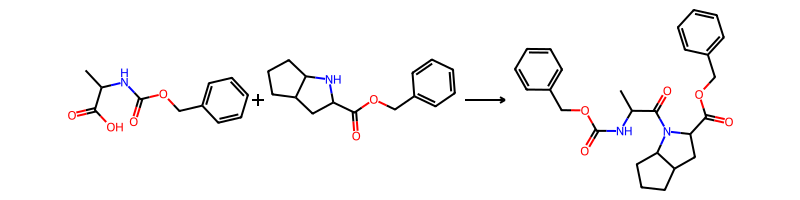

###  <span style="color: #090">Showing path </span> 10 <span style="color: #090"> with confidence </span>0.995: <br> 


<span style="color: #090"> Reaction: </span>CC(N)C(=O)N1C(C(=O)O)CC2CCCC21 + CCOC(=O)C(=O)CCc1ccccc1 + [BH3-]C#N.[Na+] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


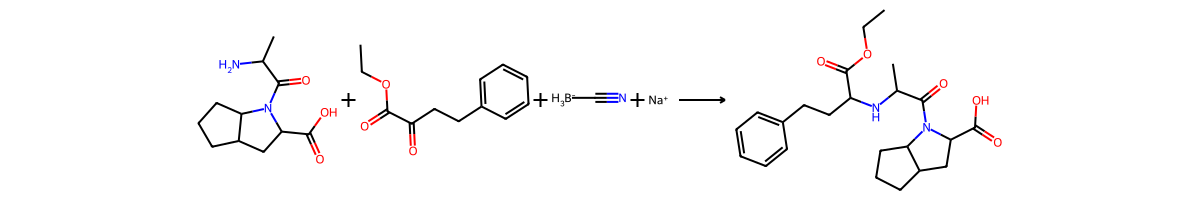

<span style="color: #090"> Reaction: </span>CC(NC(=O)OCc1ccccc1)C(=O)N1C(C(=O)O)CC2CCCC21 + CO + [H][H] + [Pd] --->> CC(N)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


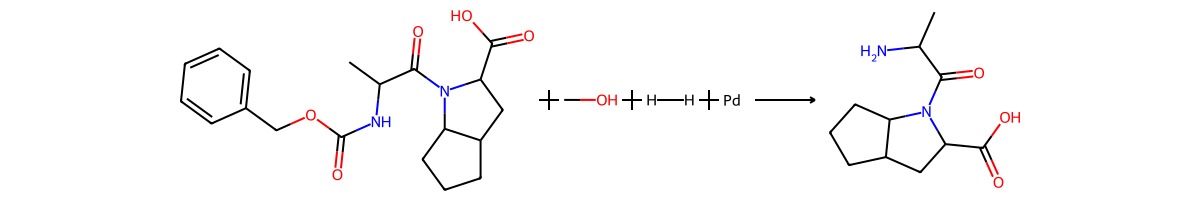

<span style="color: #090"> Reaction: </span>CC(NC(=O)OCc1ccccc1)C(=O)O + O=C(O)C1CC2CCCC2N1 --->> CC(NC(=O)OCc1ccccc1)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


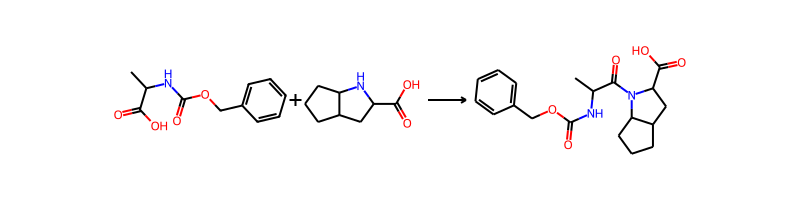

###  <span style="color: #090">Showing path </span> 11 <span style="color: #090"> with confidence </span>0.995: <br> 


<span style="color: #090"> Reaction: </span>CC(N)C(=O)N1C(C(=O)O)CC2CCCC21 + CCOC(=O)C(=O)CCc1ccccc1 + [BH3-]C#N.[Na+] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


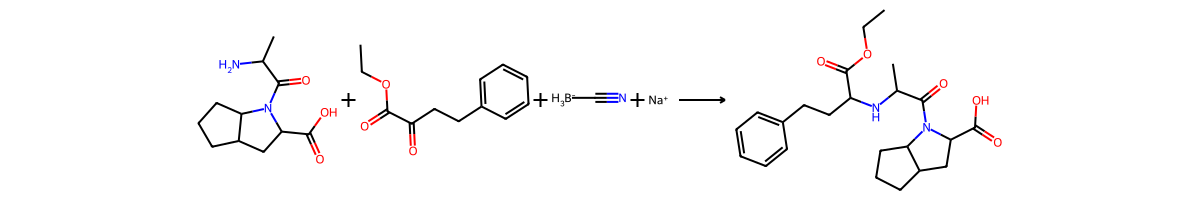

<span style="color: #090"> Reaction: </span>CC(NC(=O)OCc1ccccc1)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CC(N)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


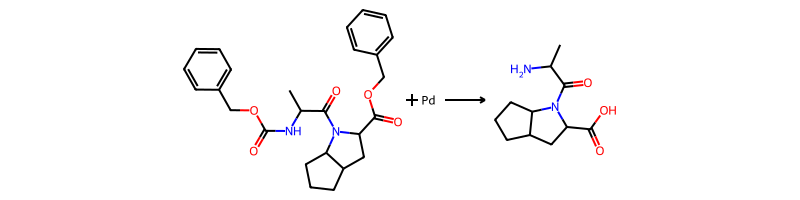

<span style="color: #090"> Reaction: </span>CC(NC(=O)OCc1ccccc1)C(=O)O + CCN(C(C)C)C(C)C + CN(C)C(On1nnc2cccnc21)=[N+](C)C.F[P-](F)(F)(F)(F)F + CN(C)C=O + O=C(OCc1ccccc1)C1CC2CCCC2N1 --->> CC(NC(=O)OCc1ccccc1)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


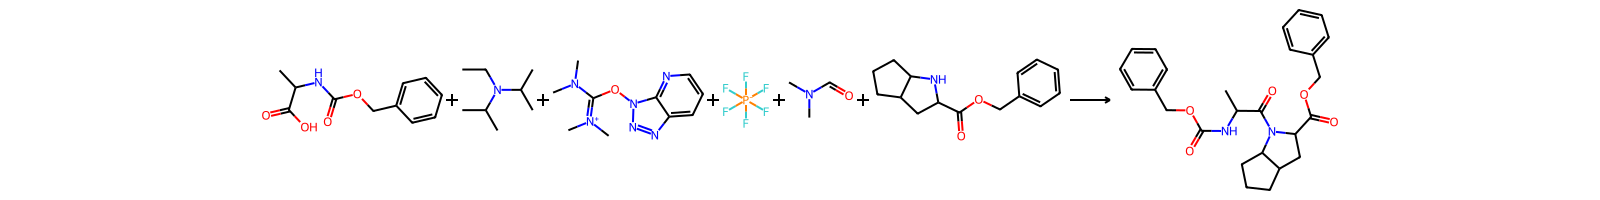

###  <span style="color: #090">Showing path </span> 12 <span style="color: #090"> with confidence </span>0.995: <br> 


<span style="color: #090"> Reaction: </span>CC(N)C(=O)N1C(C(=O)O)CC2CCCC21 + CCOC(=O)C(=O)CCc1ccccc1 + [BH3-]C#N.[Na+] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


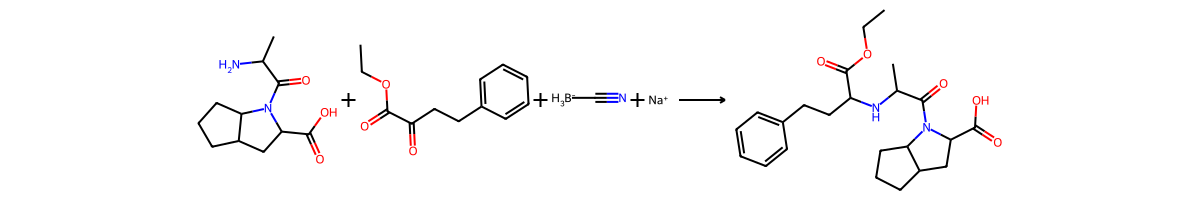

<span style="color: #090"> Reaction: </span>CC(NC(=O)OCc1ccccc1)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CC(N)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


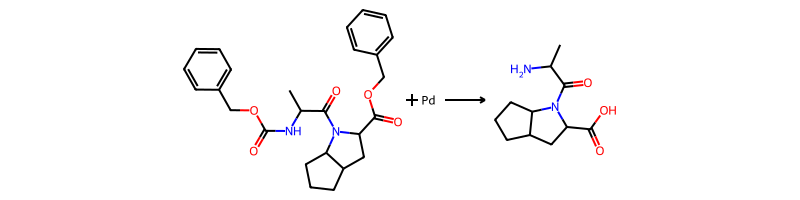

<span style="color: #090"> Reaction: </span>CC(NC(=O)OCc1ccccc1)C(=O)O + CCN(C(C)C)C(C)C + CN(C)C(On1nnc2ccccc21)=[N+](C)C.F[P-](F)(F)(F)(F)F + CN(C)C=O + O=C(OCc1ccccc1)C1CC2CCCC2N1 --->> CC(NC(=O)OCc1ccccc1)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


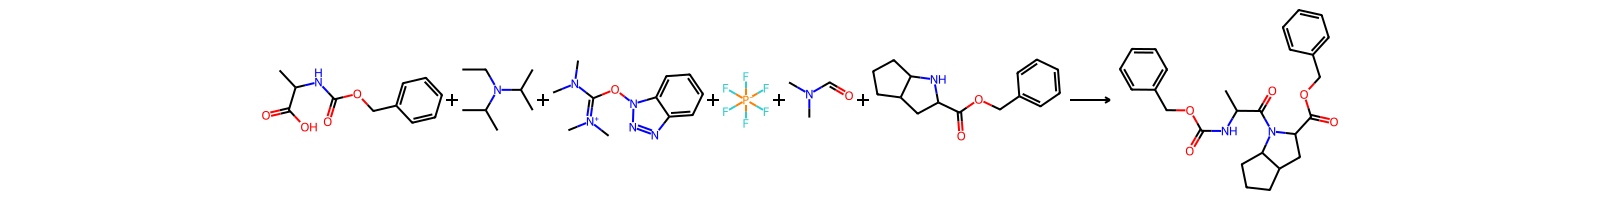

###  <span style="color: #090">Showing path </span> 13 <span style="color: #090"> with confidence </span>0.995: <br> 


<span style="color: #090"> Reaction: </span>CC(N)C(=O)N1C(C(=O)O)CC2CCCC21 + CCOC(=O)C(=O)CCc1ccccc1 + [BH3-]C#N.[Na+] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


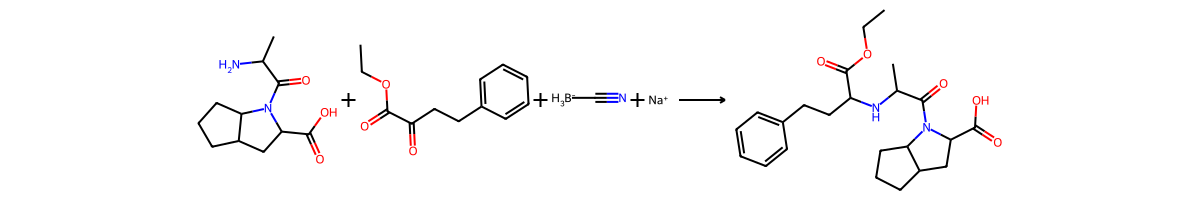

<span style="color: #090"> Reaction: </span>CC(NC(=O)OCc1ccccc1)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CC(N)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


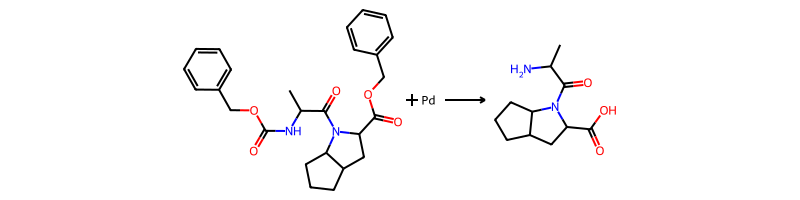

<span style="color: #090"> Reaction: </span>CC(NC(=O)OCc1ccccc1)C(=O)O + CCN(C(C)C)C(C)C + CN(C)C(On1nnc2cccnc21)=[N+](C)C.F[P-](F)(F)(F)(F)F + CN(C)C=O + O + O=C(OCc1ccccc1)C1CC2CCCC2N1 --->> CC(NC(=O)OCc1ccccc1)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


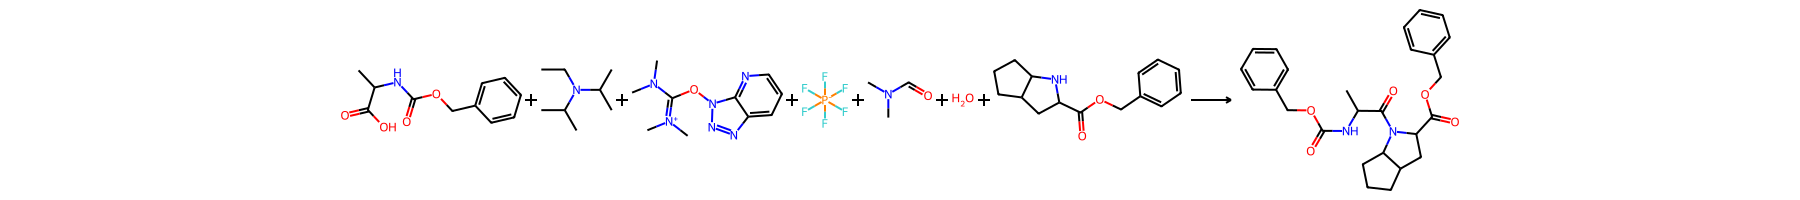

###  <span style="color: #090">Showing path </span> 14 <span style="color: #090"> with confidence </span>0.995: <br> 


<span style="color: #090"> Reaction: </span>CC(N)C(=O)N1C(C(=O)O)CC2CCCC21 + CCOC(=O)C(=O)CCc1ccccc1 + [BH3-]C#N.[Na+] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


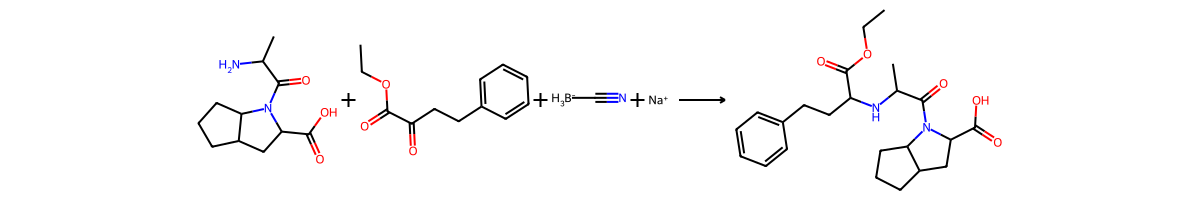

<span style="color: #090"> Reaction: </span>CC(NC(=O)OCc1ccccc1)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CC(N)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


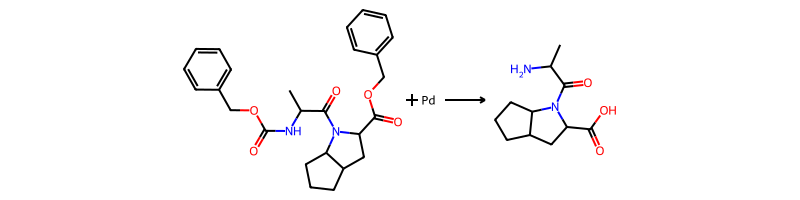

<span style="color: #090"> Reaction: </span>CC(NC(=O)OCc1ccccc1)C(=O)O + CCN=C=NCCCN(C)C.Cl + CN(C)c1ccncc1 + ClCCl + O=C(OCc1ccccc1)C1CC2CCCC2N1 --->> CC(NC(=O)OCc1ccccc1)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


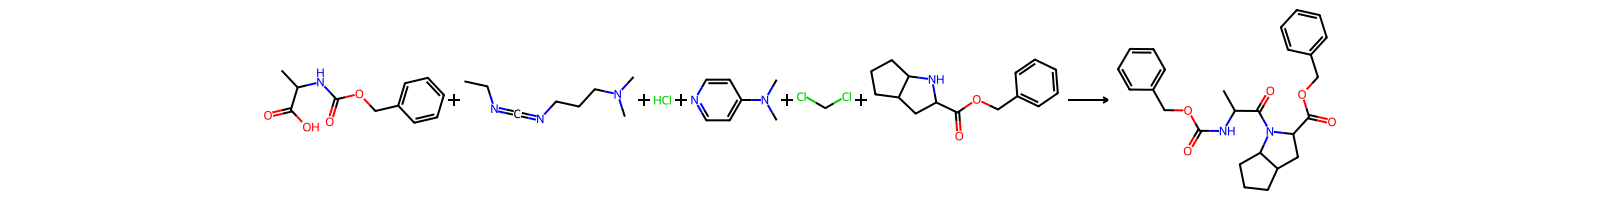

###  <span style="color: #090">Showing path </span> 15 <span style="color: #090"> with confidence </span>0.995: <br> 


<span style="color: #090"> Reaction: </span>CC(N)C(=O)N1C(C(=O)O)CC2CCCC21 + CCOC(=O)C(=O)CCc1ccccc1 + [BH3-]C#N.[Na+] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


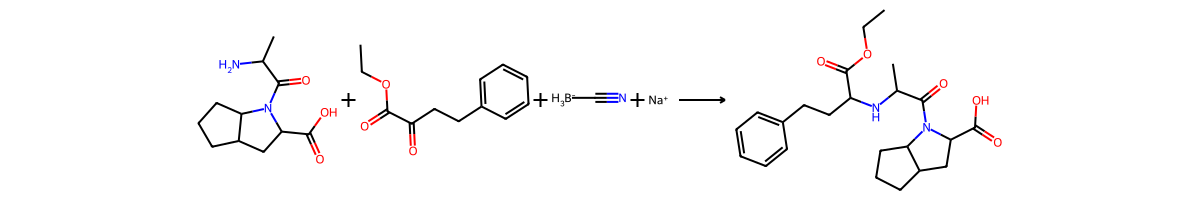

<span style="color: #090"> Reaction: </span>CC(NC(=O)OCc1ccccc1)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CC(N)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


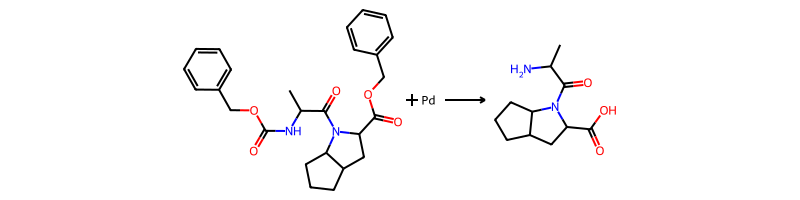

<span style="color: #090"> Reaction: </span>CC(NC(=O)OCc1ccccc1)C(=O)O + CCN(C(C)C)C(C)C + CCN=C=NCCCN(C)C.Cl + CN(C)C=O + O=C(OCc1ccccc1)C1CC2CCCC2N1 + On1nnc2ccccc21 --->> CC(NC(=O)OCc1ccccc1)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


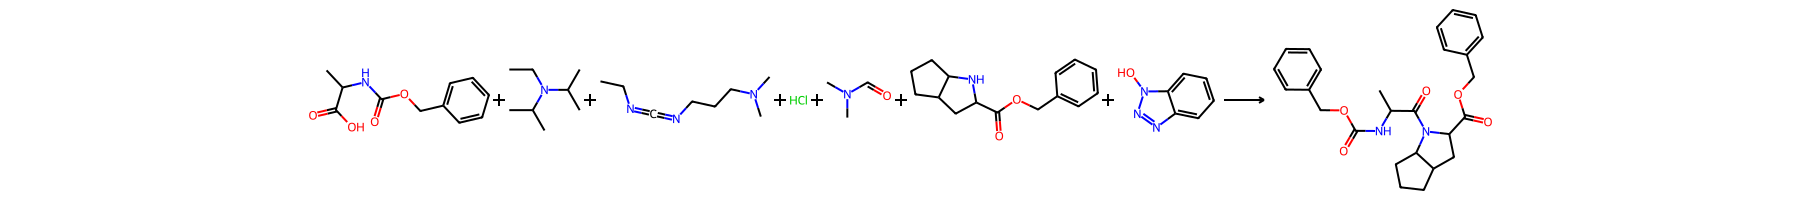

###  <span style="color: #090">Showing path </span> 16 <span style="color: #090"> with confidence </span>0.995: <br> 


<span style="color: #090"> Reaction: </span>CC(N)C(=O)N1C(C(=O)O)CC2CCCC21 + CCOC(=O)C(=O)CCc1ccccc1 + [BH3-]C#N.[Na+] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


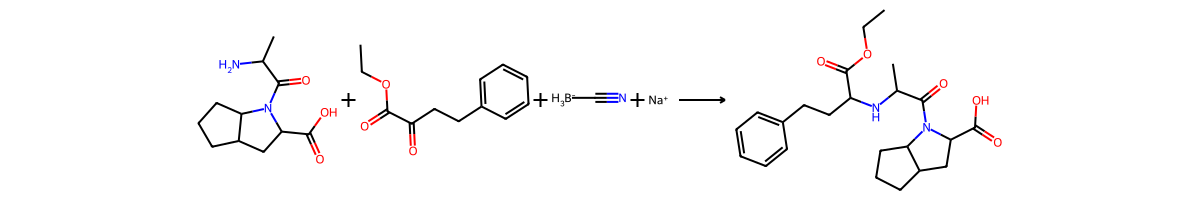

<span style="color: #090"> Reaction: </span>CC(NC(=O)OCc1ccccc1)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CC(N)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


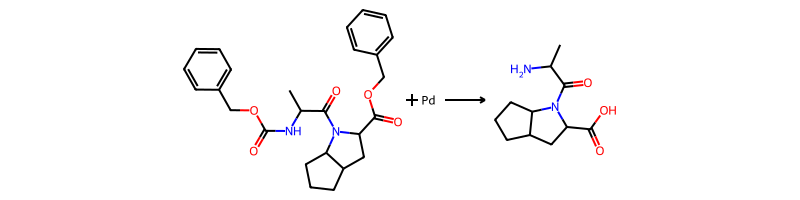

<span style="color: #090"> Reaction: </span>CC(NC(=O)OCc1ccccc1)C(=O)O + CCN(C(C)C)C(C)C + CN(C)C(On1nnc2cccnc21)=[N+](C)C.F[P-](F)(F)(F)(F)F + ClCCl + O=C(OCc1ccccc1)C1CC2CCCC2N1 --->> CC(NC(=O)OCc1ccccc1)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


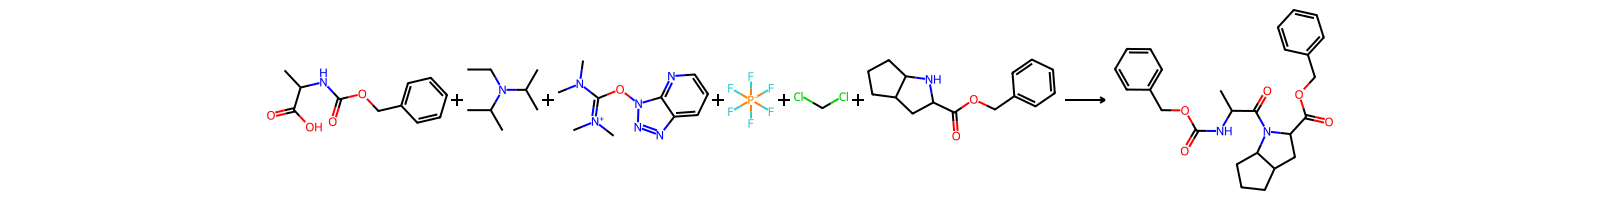

###  <span style="color: #090">Showing path </span> 17 <span style="color: #090"> with confidence </span>0.995: <br> 


<span style="color: #090"> Reaction: </span>CC(N)C(=O)N1C(C(=O)O)CC2CCCC21 + CCOC(=O)C(=O)CCc1ccccc1 + [BH3-]C#N.[Na+] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


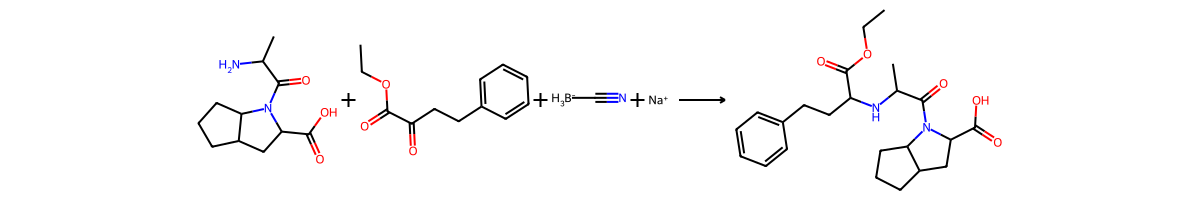

<span style="color: #090"> Reaction: </span>CC(NC(=O)OCc1ccccc1)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CC(N)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


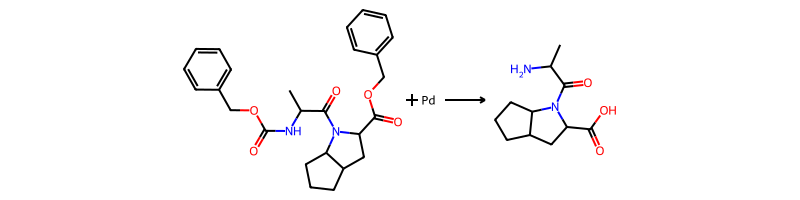

<span style="color: #090"> Reaction: </span>CC(NC(=O)OCc1ccccc1)C(=O)O + CCN=C=NCCCN(C)C.Cl + ClCCl + O=C(OCc1ccccc1)C1CC2CCCC2N1 + On1nnc2ccccc21 --->> CC(NC(=O)OCc1ccccc1)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


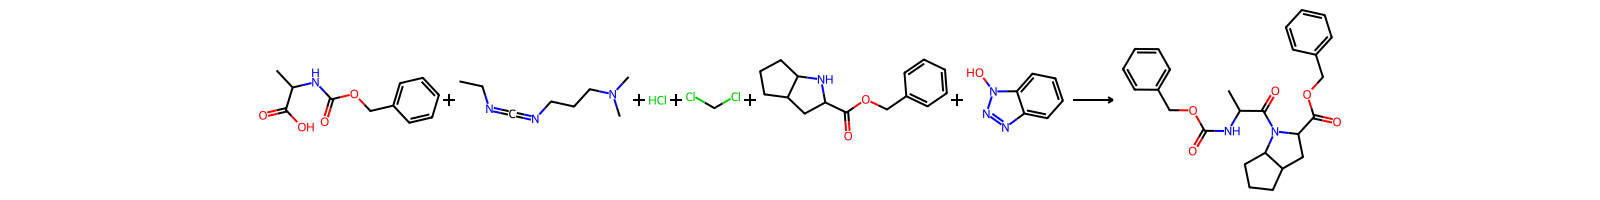

###  <span style="color: #090">Showing path </span> 18 <span style="color: #090"> with confidence </span>0.995: <br> 


<span style="color: #090"> Reaction: </span>CC(N)C(=O)N1C(C(=O)O)CC2CCCC21 + CCOC(=O)C(=O)CCc1ccccc1 + [BH3-]C#N.[Na+] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


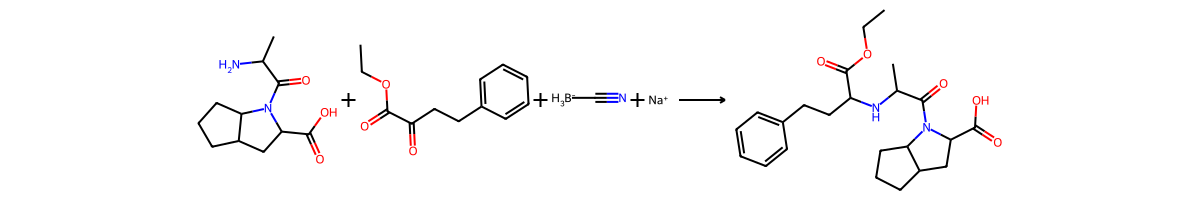

<span style="color: #090"> Reaction: </span>CC(NC(=O)OCc1ccccc1)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CC(N)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


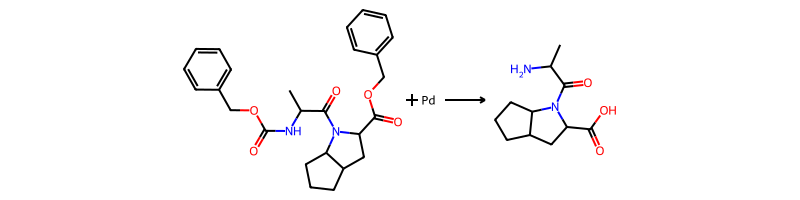

<span style="color: #090"> Reaction: </span>CC(NC(=O)OCc1ccccc1)C(=O)O + CCN(C(C)C)C(C)C + CCN=C=NCCCN(C)C.Cl + ClCCl + O=C(OCc1ccccc1)C1CC2CCCC2N1 + On1nnc2ccccc21 --->> CC(NC(=O)OCc1ccccc1)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


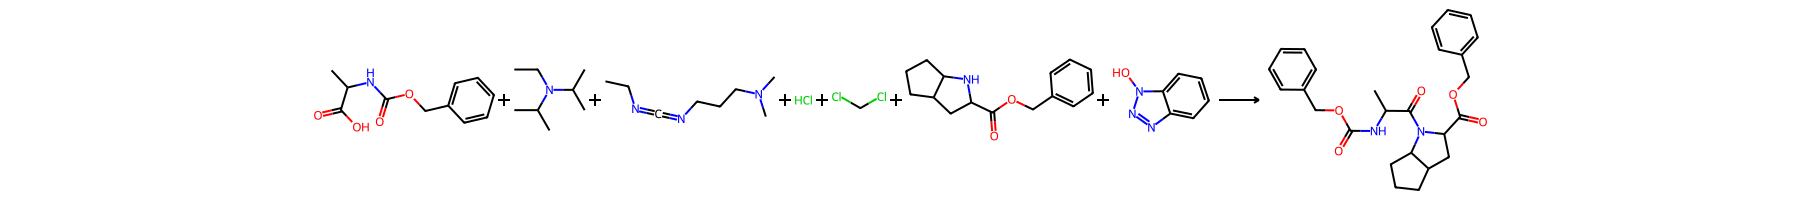

###  <span style="color: #090">Showing path </span> 19 <span style="color: #090"> with confidence </span>0.999: <br> 


<span style="color: #090"> Reaction: </span>C1CCOC1 + CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


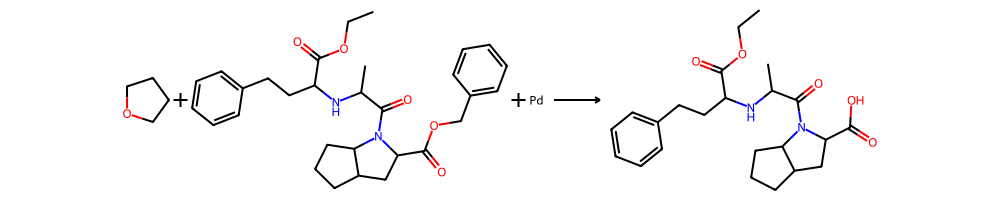

<span style="color: #090"> Reaction: </span>CC(Br)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + CCN(CC)CC + CCOC(=O)C(N)CCc1ccccc1 --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


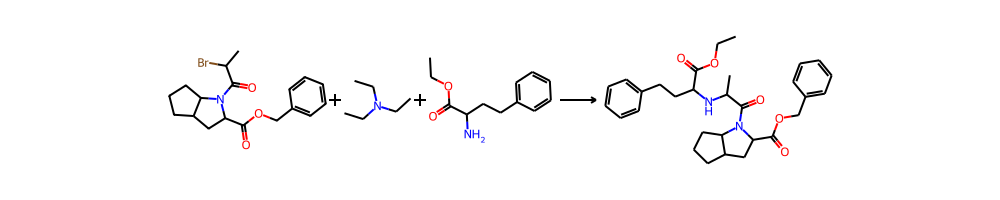

<span style="color: #090"> Reaction: </span>CC(Br)C(=O)Br + ClCCl + O=C(OCc1ccccc1)C1CC2CCCC2N1 + O=C([O-])O.[Na+] --->> CC(Br)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


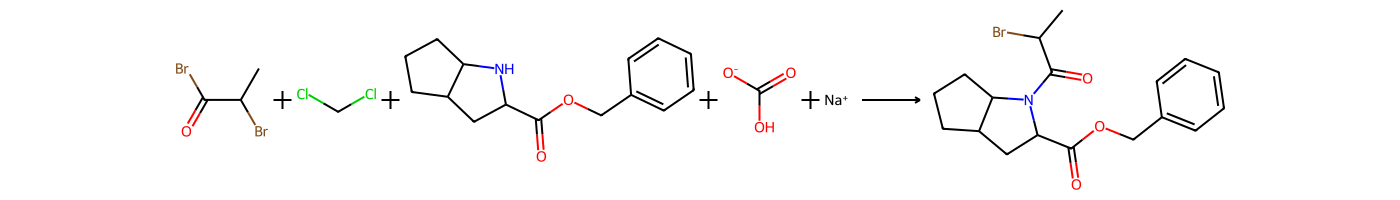

###  <span style="color: #090">Showing path </span> 20 <span style="color: #090"> with confidence </span>0.999: <br> 


<span style="color: #090"> Reaction: </span>C1CCOC1 + CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


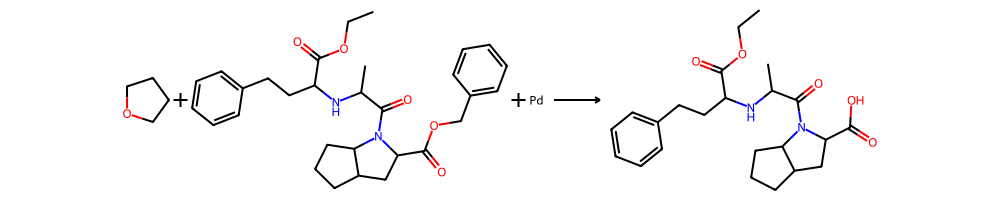

<span style="color: #090"> Reaction: </span>CC(Br)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + CCN(CC)CC + CCOC(=O)C(N)CCc1ccccc1 --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


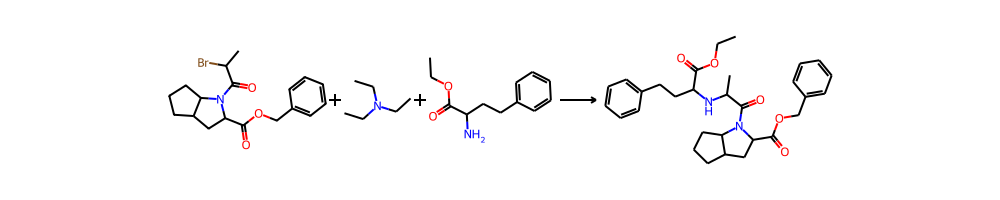

<span style="color: #090"> Reaction: </span>CC(Br)C(=O)Cl + ClCCl + O=C(OCc1ccccc1)C1CC2CCCC2N1 + O=C([O-])O.[Na+] --->> CC(Br)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


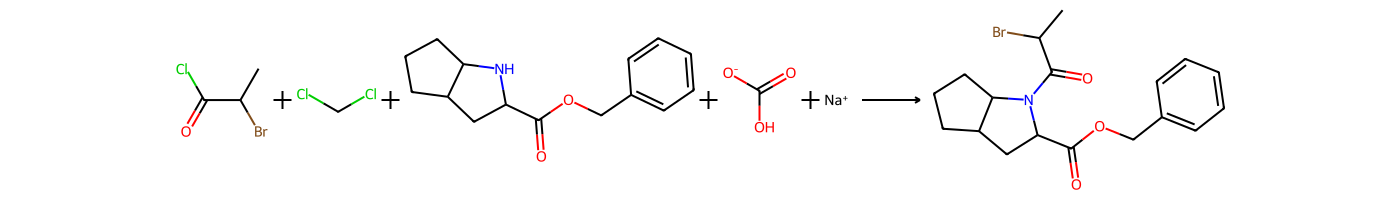

###  <span style="color: #090">Showing path </span> 21 <span style="color: #090"> with confidence </span>0.999: <br> 


<span style="color: #090"> Reaction: </span>C1CCOC1 + CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


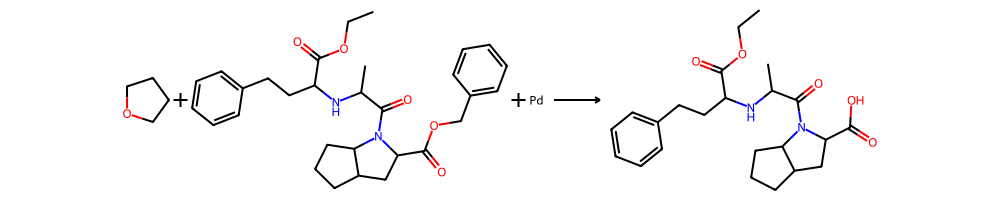

<span style="color: #090"> Reaction: </span>CC(Br)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + CCN(CC)CC + CCOC(=O)C(N)CCc1ccccc1 --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


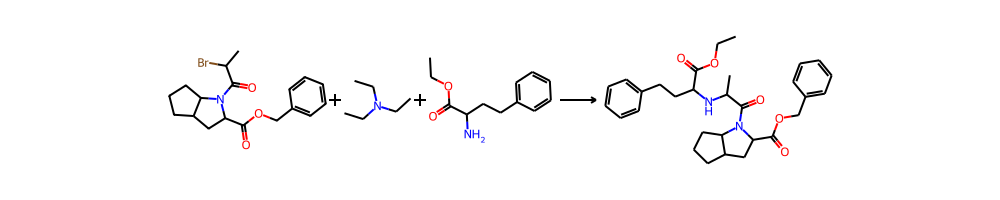

<span style="color: #090"> Reaction: </span>CC(Br)C(=O)Br + ClCCl + O=C(OCc1ccccc1)C1CC2CCCC2N1 + c1ccncc1 --->> CC(Br)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


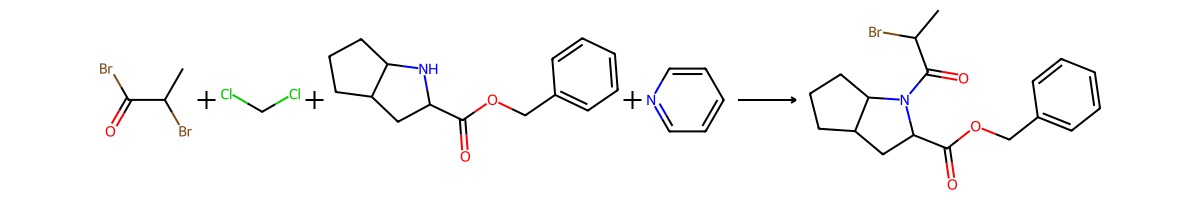

###  <span style="color: #090">Showing path </span> 22 <span style="color: #090"> with confidence </span>0.999: <br> 


<span style="color: #090"> Reaction: </span>C1CCOC1 + CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


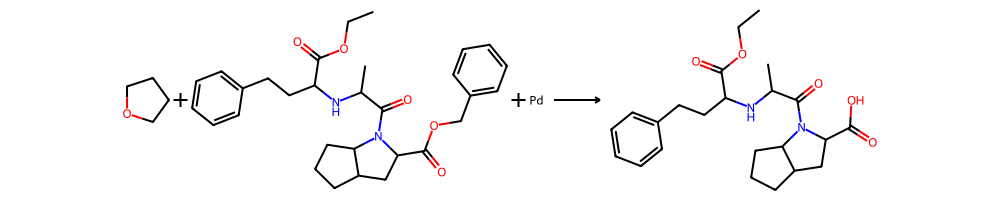

<span style="color: #090"> Reaction: </span>CC(Br)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + CCN(CC)CC + CCOC(=O)C(N)CCc1ccccc1 --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


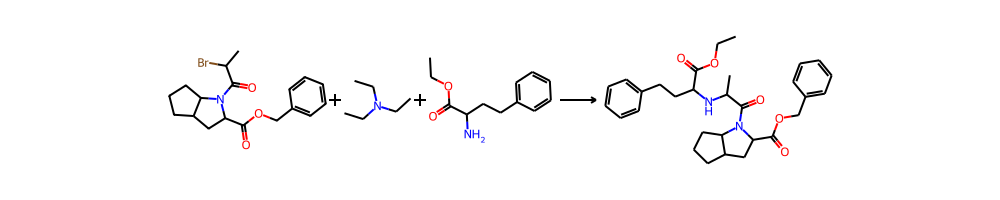

<span style="color: #090"> Reaction: </span>CC(Br)C(=O)Cl + ClCCl + O=C(OCc1ccccc1)C1CC2CCCC2N1 + c1ccncc1 --->> CC(Br)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


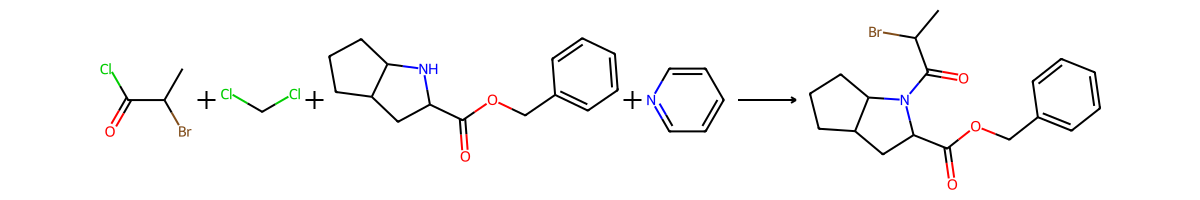

###  <span style="color: #090">Showing path </span> 23 <span style="color: #090"> with confidence </span>0.999: <br> 


<span style="color: #090"> Reaction: </span>C1CCOC1 + CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


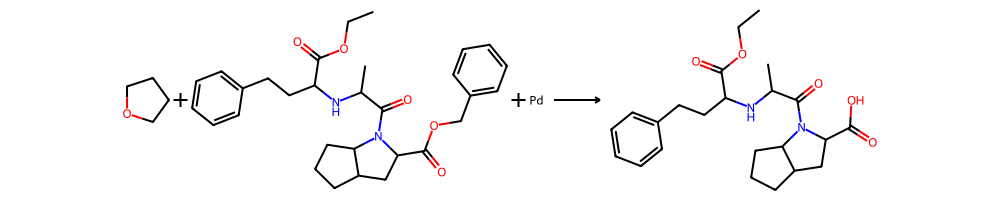

<span style="color: #090"> Reaction: </span>CC(Br)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + CCN(CC)CC + CCOC(=O)C(N)CCc1ccccc1 --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


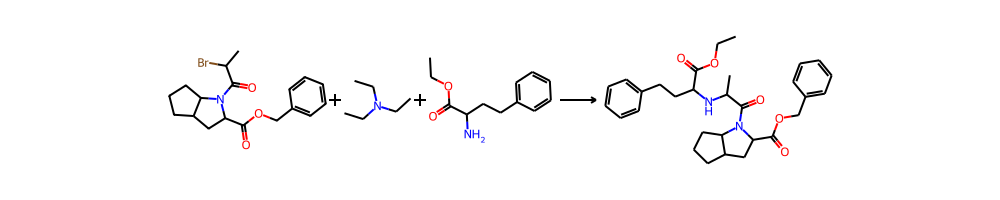

<span style="color: #090"> Reaction: </span>CC(Br)C(=O)Cl + O=C(OCc1ccccc1)C1CC2CCCC2N1 + c1ccncc1 --->> CC(Br)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


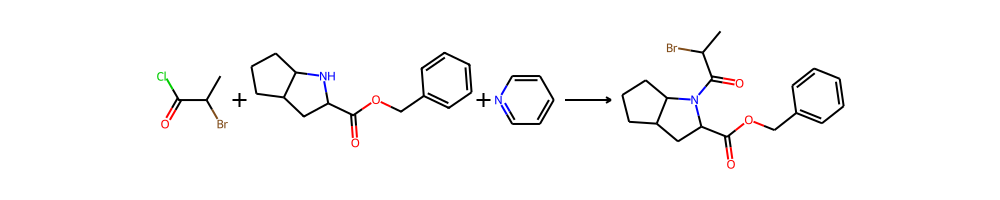

###  <span style="color: #090">Showing path </span> 24 <span style="color: #090"> with confidence </span>0.999: <br> 


<span style="color: #090"> Reaction: </span>C1CCOC1 + CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


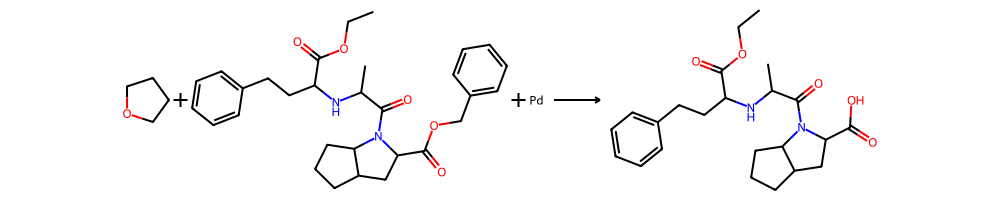

<span style="color: #090"> Reaction: </span>CC(Br)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + CCN(CC)CC + CCOC(=O)C(N)CCc1ccccc1 --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


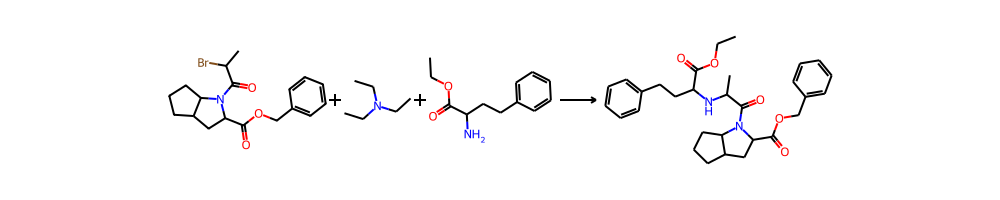

<span style="color: #090"> Reaction: </span>CC(Br)C(=O)Cl + CCN(CC)CC + ClCCl + O=C(OCc1ccccc1)C1CC2CCCC2N1 --->> CC(Br)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


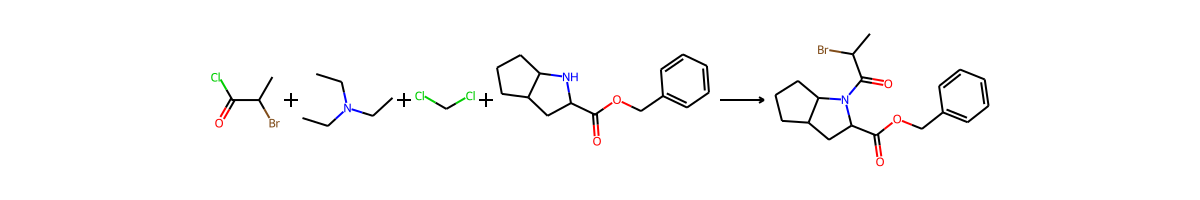

###  <span style="color: #090">Showing path </span> 25 <span style="color: #090"> with confidence </span>0.999: <br> 


<span style="color: #090"> Reaction: </span>C1CCOC1 + CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


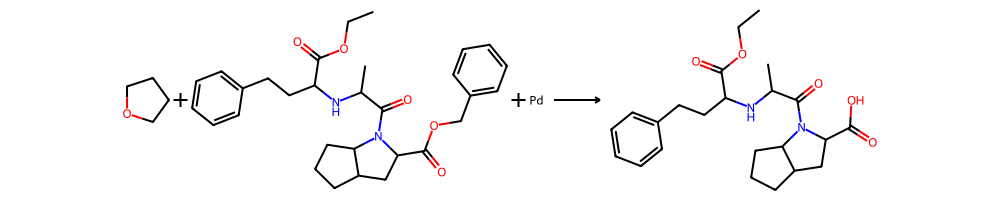

<span style="color: #090"> Reaction: </span>CC(Br)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + CCN(CC)CC + CCOC(=O)C(N)CCc1ccccc1 --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


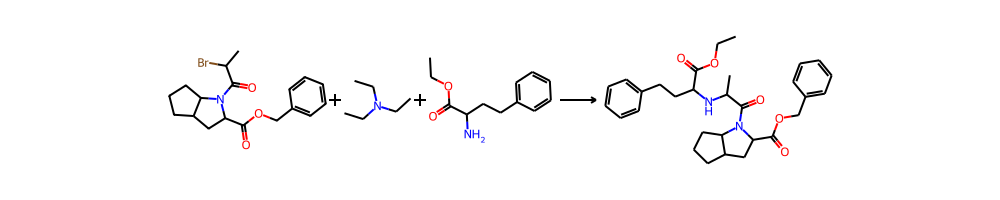

<span style="color: #090"> Reaction: </span>CC(Br)C(=O)Br + O=C(OCc1ccccc1)C1CC2CCCC2N1 --->> CC(Br)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


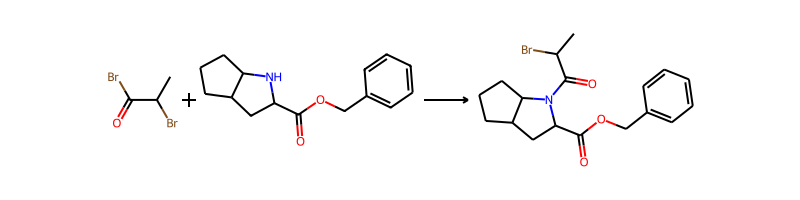

###  <span style="color: #090">Showing path </span> 26 <span style="color: #090"> with confidence </span>0.999: <br> 


<span style="color: #090"> Reaction: </span>C1CCOC1 + CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


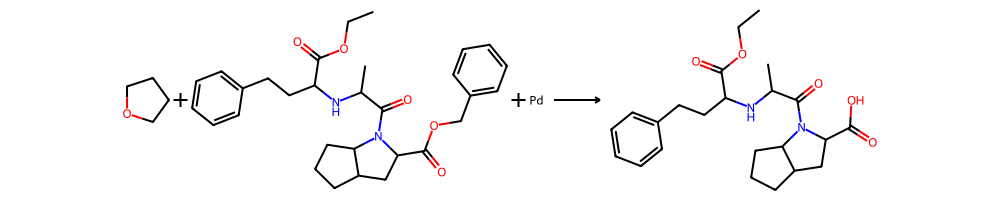

<span style="color: #090"> Reaction: </span>CC(Br)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + CCN(CC)CC + CCOC(=O)C(N)CCc1ccccc1 --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


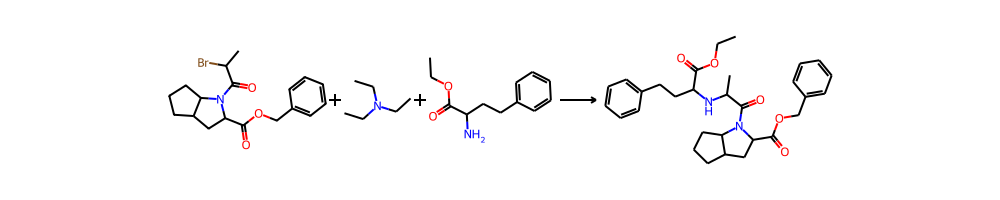

<span style="color: #090"> Reaction: </span>CC(Br)C(=O)Cl + ClCCl + O=C(OCc1ccccc1)C1CC2CCCC2N1 --->> CC(Br)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


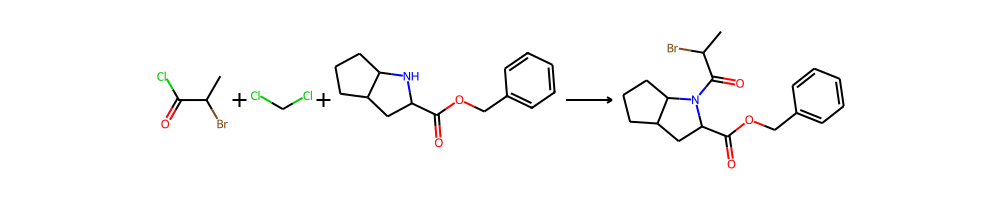

###  <span style="color: #090">Showing path </span> 27 <span style="color: #090"> with confidence </span>0.999: <br> 


<span style="color: #090"> Reaction: </span>C1CCOC1 + CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


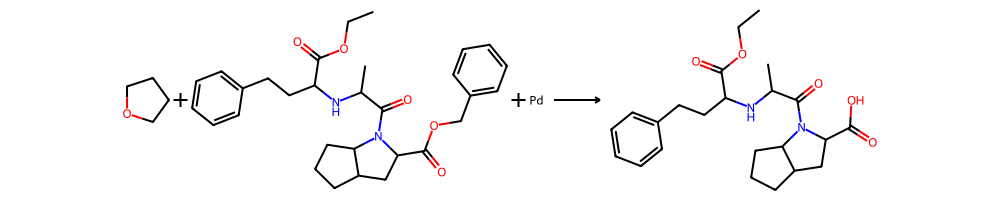

<span style="color: #090"> Reaction: </span>CC(Br)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + CCN(CC)CC + CCOC(=O)C(N)CCc1ccccc1 --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


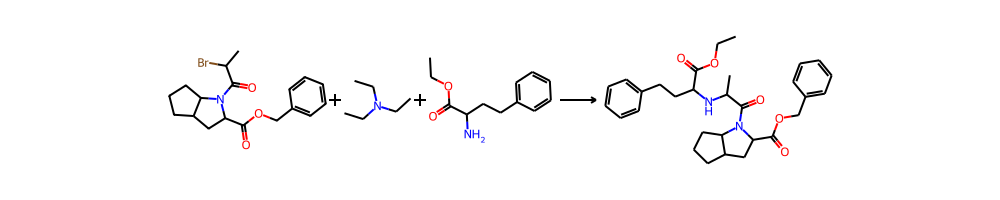

<span style="color: #090"> Reaction: </span>CC(Br)C(=O)Br + ClCCl + O=C(OCc1ccccc1)C1CC2CCCC2N1 --->> CC(Br)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


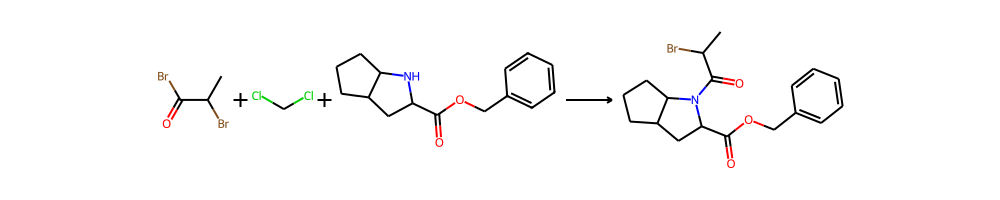

###  <span style="color: #090">Showing path </span> 28 <span style="color: #090"> with confidence </span>0.999: <br> 


<span style="color: #090"> Reaction: </span>C1CCOC1 + CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


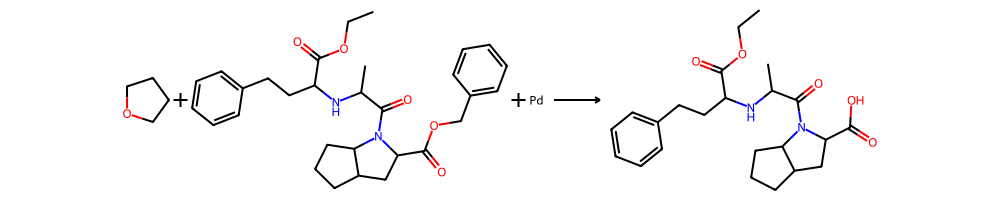

<span style="color: #090"> Reaction: </span>CC(Br)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + CCN(CC)CC + CCOC(=O)C(N)CCc1ccccc1 --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


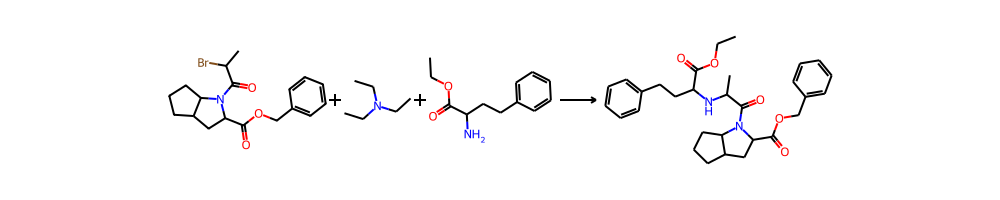

<span style="color: #090"> Reaction: </span>CC(Br)C(=O)Cl + O=C(OCc1ccccc1)C1CC2CCCC2N1 --->> CC(Br)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


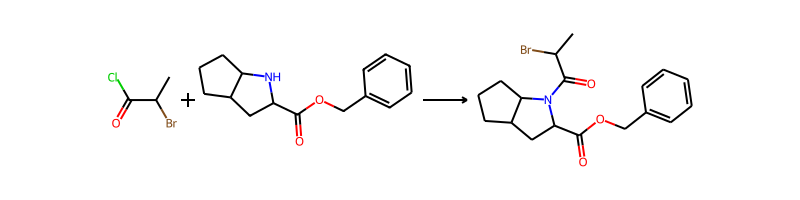

###  <span style="color: #090">Showing path </span> 29 <span style="color: #090"> with confidence </span>0.999: <br> 


<span style="color: #090"> Reaction: </span>C1CCOC1 + CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + [Pd] --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)O)CC2CCCC21 <br> 


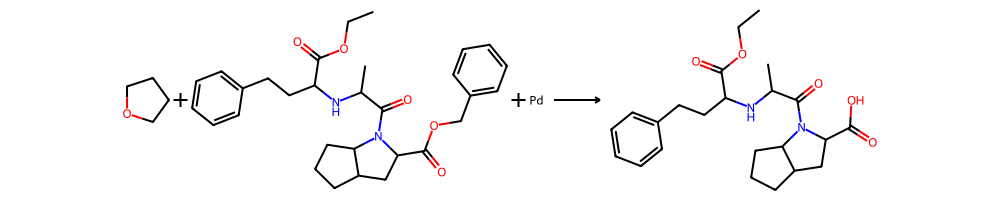

<span style="color: #090"> Reaction: </span>CC(Br)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 + CCN(CC)CC + CCOC(=O)C(N)CCc1ccccc1.Cl --->> CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


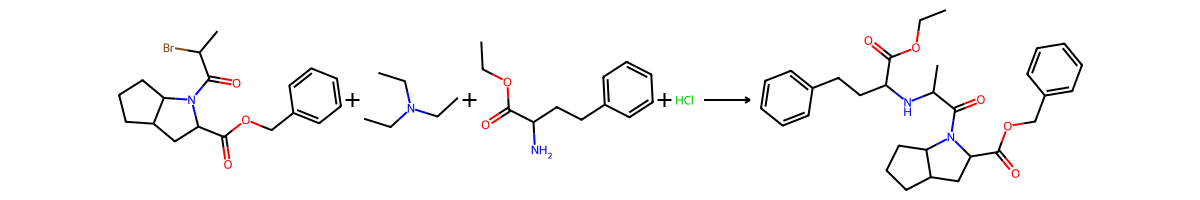

<span style="color: #090"> Reaction: </span>CC(Br)C(=O)Br + ClCCl + O=C(OCc1ccccc1)C1CC2CCCC2N1 + O=C([O-])O.[Na+] --->> CC(Br)C(=O)N1C(C(=O)OCc2ccccc2)CC2CCCC21 <br> 


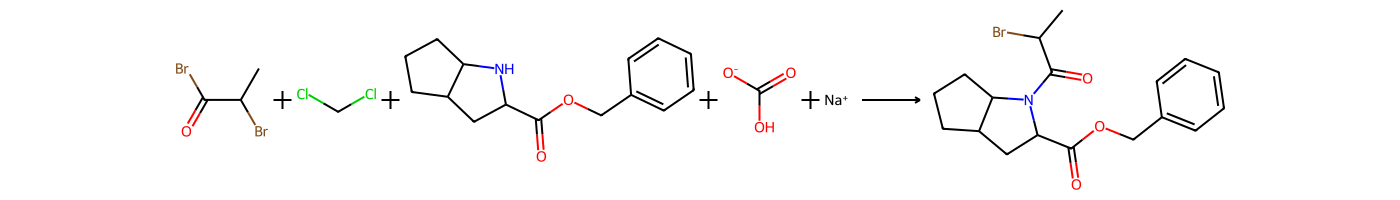

<span style="color: #090"> Reaction: </span>CC(=O)Cl + CCO + NC(CCc1ccccc1)C(=O)O --->> CCOC(=O)C(N)CCc1ccccc1.Cl <br> 


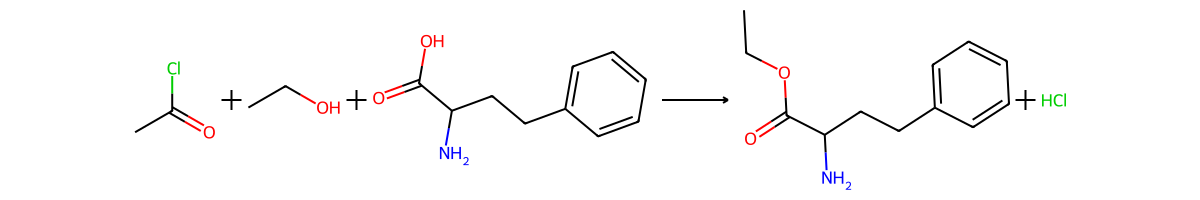

In [3]:
mol = %openadd @tritace>>canonical_smiles
%openad set context rxn
%openad predict retrosynthesis '{mol}' using( max_steps=3 )

<span style="color: #090">Logged into DS4SD as </span>phil.downey1@ibm.com<span style="color: #090"> <br> 
Workspace:</span> DEFAULT <br> 


<span style="color: #090">You successfully logged in to <span style="color: #dc0">DS4SD</span></span> <br> 
<span style="color: #ccc">Your access token expires on Thu Dec 12, 2024  at 07:43</span> <br> 


**We found 20 patents containing the requested SMILES** <br> 


CCOC(=O)C(CCC1=CC=CC=C1)NC(C)C(=O)N2C3CCCC3CC2C(=O)O <br> 


<span style="color: #ccc">Next up, you can run: </span>`result open`/`edit`/`copy`/`display`/`as dataframe`/`save [as '<filename.csv>']` <br> 


**We found 10 molecules similar to the provided SMILES** <br> 


CCOC(=O)C(CCC1=CC=CC=C1)NC(C)C(=O)N2C3CCCC3CC2C(=O)O <br> 


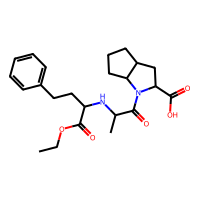

<span style="color: #ccc">Next up, you can run: </span>`result open`/`edit`/`copy`/`display`/`as dataframe`/`save [as '<filename.csv>']` <br> 


In [4]:
%openad set context ds4sd
%openad search for patents containing molecule '{mol}'
%openad search for similar molecules to '{mol}'

In [5]:
%openad list molecules

<span style="color: #ccc">Next up, you can run: </span>`result open`/`edit`/`copy`/`display`/`as dataframe`/`save [as '<filename.csv>']` <br> 


In [6]:
%openad enrich molecules with analysis 
%openad display molecule tritace

inchikey HDACQVRGBOVJII-UHFFFAOYSA-N
inchikey BSYNRYMUTXBXSQ-UHFFFAOYSA-N
inchikey HEFNNWSXXWATRW-UHFFFAOYSA-N
inchikey ZASXKEGREHRXDL-UHFFFAOYSA-H


<span style="color: #090">5/4 molecules in your working set have been enriched with the latest analysis results</span> <br> 
<span style="color: #ccc">Run `show mols` to view the updated working set</span> <br> 


11
11
11
12


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
%openad list molecules

In [ ]:
%openad show molecules